# 2. Numpy 모듈 이해하기 


In [1]:
%matplotlib inline
import numpy as np

##  np.Ndarray 클래스 이해하기

### 리스트 만들기

    리스트는 배열이지만 객체를 보관해서 관리할 수 있다. 그런 이유로 객체의 특성을 별도로 관리하므로 세부적인 관리기준이 일반적인 배열과 다르다.
    

In [3]:
l = [1,2,3]

In [7]:
l, type(l)

([1, 2, 3], list)

### 넘파이 배열 

In [5]:
a = np.array([1,2,3])
print(a)

[1 2 3]


In [6]:
type(a)

numpy.ndarray

### 덧셈 연산자 사용할 때 차이점?

    리스트는 덧셈연산자를 사용하면 실제 두 개의 리스트를 연결하지만 넘파이 배열은 내부의 원소간의 덧셈을 처리한다.
    

In [8]:
l+l

[1, 2, 3, 1, 2, 3]

In [9]:
a+a

array([2, 4, 6])

In [10]:


# 두개의 리스트의 원소를 더하려면

for i in range(len(l)) :
    l[i] += l[i]
    
print(l)


[2, 4, 6]


###  numpy.ndarray와 lits 타입 차이점


### 데이터 관리 기준  : flat 

   다 차원 배열도 차원과 상관없이 내부적으로 데이터는  flat한  구조로 관리 
   

In [11]:
a = np.array([1,2,3,4,5,6])

print("flat : ", a.flat)


flat :  <numpy.flatiter object at 0x7f8055dcae00>


### 실제 데이터는 배열 내의 속성의 data 내의 obj 내에 저장해서 관리한다.

In [13]:
a.data

In [14]:
a.data.obj

array([1, 2, 3, 4, 5, 6])

In [12]:
print(list(a.flat))
print(a.data.tolist())

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]


#### reshape 함수로 view를 5행 5열로 정의해서 사용 

    실제 내부는 flat이므로  flat 속성을 가지고 직접 접근해서 조회 및 수정이 가능함
    

In [16]:
y = np.reshape(np.arange(25.0),(5,5))
print(y)


[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  24.]]


In [17]:
print(" 0번째 : ",y.flat[0])
print(" 6번째 : ",y.flat[5])
print(" 11번째 : ",y.flat[10])

print(" 25번째 : ",y.flat[24])
y.flat[24] = 99
print(y)
print(" 25번째 : ",y.flat[24])

 0번째 :  0.0
 6번째 :  5.0
 11번째 :  10.0
 25번째 :  24.0
[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  99.]]
 25번째 :  99.0


###  원본을 유지하고 항상 memoryview 제공  

In [19]:
a = np.array([1,2,3,4,5,6])
print("data  : ", a.data)
print(type(a.data))


data  :  <memory at 0x111010948>
<class 'memoryview'>


#### 원본일 경우는 base 속성에 데이터를 관리하지 않는다.

In [20]:
print("base  : ", a.base)

base  :  None


### data type과 strides 관계

    데이터 타입에 따라 strides 구성에 차이가 생김

In [21]:
a = np.array([1,2,3,4,5,6])
print("data type : ", a.dtype)
print("cdata type : ", a.ctypes)
print("strides : ", a.strides)
print(" size : ", a.size)
print(" item size : ", a.itemsize)


data type :  int64
cdata type :  <numpy.core._internal._ctypes object at 0x1112384a8>
strides :  (8,)
 size :  6
 item size :  8


In [22]:
b = np.array([1,2,3], dtype=np.float64)
print("data type : ", b.dtype)
print("cdata type : ", b.ctypes)
print("strides : ", b.strides)
print(" size : ", b.size)
print(" itemsize : ", b.itemsize)

data type :  float64
cdata type :  <numpy.core._internal._ctypes object at 0x1112334e0>
strides :  (8,)
 size :  3
 itemsize :  8


### dtype 처리 이해하기 

    기존 데이터가 int로 생성된 경우는 dtype에 맞춰 데이터를 관리하므로 int이고 넘파이 배열은 모든 원소가 동일한 타입이므로
    원소를 float으로 하나를 변경한다면 실제 int로 처리되는 것을 볼 수 있다.
    

In [90]:
x = [0, 1, 2, 3, 4] # Integers
y = np.array(x)
print(y.dtype)

y[0] = 3.141592
print(y)


int32
[3 1 2 3 4]


#### 넘파이 배열을 생성할 때 float으로 결정될 경우에는

    실제  특정 영역에 재할당할 때 실수로 넣으면 실수로 저장되는 것을 알 수 있다.

In [91]:

x = [0.0,1, 2, 3, 4] # 1 Float makes all float
y = np.array(x)
print(y.dtype)

y[0] = 3.141592
print(y)

float64
[ 3.141592  1.        2.        3.        4.      ]


## 차원별로 넘파이 배열 만들어 보기


#### 0차원의 scalar 만들기

In [12]:
a = np.array(1)
print(a, type(a))

print("demension : ",a.ndim)
print("shape : ",a.shape)
print("data type : ", a.dtype)

1 <class 'numpy.ndarray'>
demension :  0
shape :  ()
data type :  int32


#### 1차원의 벡터 만들기

In [49]:
a = np.array([1,2,3])
print(a, type(a))

print("demension : ",a.ndim)
print("shape : ",a.shape)
print("data type : ", a.dtype)
print("strides : ", a.strides)

[1 2 3] <class 'numpy.ndarray'>
demension :  1
shape :  (3,)
data type :  int32
strides :  (4,)


#### 2차원의 Matrix 만들기


In [7]:
a = np.array([[1,2,3],[4,5,6]])
print(a, type(a))

print("demension : ",a.ndim)
print("shape : ",a.shape)
print("data type : ", a.dtype)

[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'>
demension :  2
shape :  (2, 3)
data type :  int32


#### 3차원의 Cube 만들기 

In [8]:
a = np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])
print(a, type(a))

print("demension : ",a.ndim)
print("shape : ",a.shape)
print("data type : ", a.dtype)

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]] <class 'numpy.ndarray'>
demension :  3
shape :  (2, 2, 3)
data type :  int32


# 생성 함수


### 1차원 배열 생성 함수 

In [73]:
import numpy as np

zs = np.arange(10)
print(zs)

[0 1 2 3 4 5 6 7 8 9]


In [121]:
import numpy as np

zs = np.linspace(1,10,10)
print(zs)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


#### 벡터로 그래프 그리기 

   x 측은 index, y 측은 값이 됨

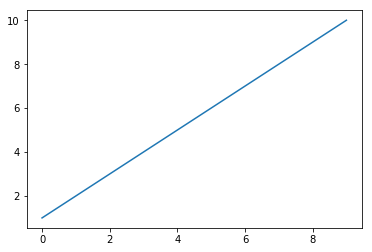

In [122]:
import matplotlib.pyplot as plt

plt.plot(zs)
plt.show()

### 다차원이 있는 배열 생성 함수 


#### 2차원 배열 값을 기준으로 그래프 그리기

[[  1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.]]


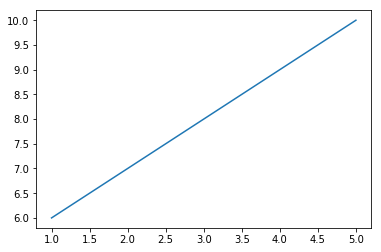

In [125]:
import numpy as np

zs = np.linspace(1,10,10).reshape(2,5)
print(zs)

import matplotlib.pyplot as plt

plt.plot(zs[0],zs[1])

plt.show()

#### zeros 함수

In [101]:
import numpy as np

print(np.zeros)
zs = np.zeros((2,2))
print(zs)

<built-in function zeros>
[[ 0.  0.]
 [ 0.  0.]]


#### ones 함수 

In [102]:
import numpy as np

print(np.ones)
os = np.ones((2,2))
print(os)

<function ones at 0x00000000053826A8>
[[ 1.  1.]
 [ 1.  1.]]


#### empty 함수 

In [104]:
import numpy as np

print(np.empty)
es = np.empty((2,2))
print(es)

<built-in function empty>
[[ 0.  0.]
 [ 0.  0.]]


###  단위행렬 생성하기


In [80]:
import numpy as np

print(np.identity(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [81]:
import numpy as np

print(np.eye(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### matrix 객체 생성하기 

    matrix만을 처리하는 객체 생성하기 

In [86]:
xm= np.matrix([[1.0],[2.0],[3.0],[4.0],[5.0]])
xa= np.array([[1.0],[2.0],[3.0],[4.0],[5.0]])

print(type(xm))
print(type(xa))

xx = xm + xa 
print(type(xx))
print(xx)

<class 'numpy.matrixlib.defmatrix.matrix'>
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
[[  2.]
 [  4.]
 [  6.]
 [  8.]
 [ 10.]]


In [89]:
print(xm.ndim)
print(xm.shape)
print(xm.dtype)
print(xm.flat)

2
(5, 1)
float64
